In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [2]:
mn_benign_df = pd.read_csv('MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
mn_benign_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529913,443,18738,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529914,53,60797,2,2,80,156,40,40,40.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529915,53,154,2,2,64,96,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
529916,53,155,2,2,80,144,40,40,40.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
tu_wh_df = pd.read_csv('MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
tu_wh_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445904,53,155,2,2,88,120,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445905,59317,110,1,1,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445906,53,166,2,2,88,188,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
445907,54726,81,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
we_wh_df = pd.read_csv('MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
we_wh_df['Label'] = we_wh_df['Label'].replace(['DoS GoldenEye'], 'Dos')
we_wh_df['Label'] = we_wh_df['Label'].replace(['DoS Hulk'], 'Dos')
we_wh_df['Label'] = we_wh_df['Label'].replace(['DoS Slowhttptest'], 'Dos')
we_wh_df['Label'] = we_wh_df['Label'].replace(['DoS slowloris'], 'Dos')
we_wh_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
th_mr_df = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � Brute Force'], 'Web Attack')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � XSS'], 'Web Attack')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � Sql Injection'], 'Web Attack')
th_mr_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [6]:
th_an_df = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
th_an_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288597,80,590930,2,0,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288598,80,1187988,2,0,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288599,80,10,1,9,6,54,6,6,6.0,0.0,...,20,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
288600,138,19,10,0,2370,0,237,237,237.0,0.0,...,20,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN


In [7]:
fr_mr_df = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
fr_mr_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [8]:
fr_an_ddos_df = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
fr_an_ddos_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
fr_an_ps_df = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', sep=r'\s*,\s*', header=0, engine='python')
fr_an_ps_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286463,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286464,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
286465,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
dfs_names = {'Monday-WorkingHours': mn_benign_df,
             'Tuesday-WorkingHours': tu_wh_df,
             'Wednesday-workingHours': we_wh_df,
             'Thursday-WorkingHours-Morning-WebAttacks': th_mr_df,
             'Thursday-WorkingHours-Afternoon-Infilteration': th_an_df,
             'Friday-WorkingHours-Morning': fr_mr_df,
             'Friday-WorkingHours-Afternoon-DDos': fr_an_ddos_df,
             'Friday-WorkingHours-Afternoon-PortScan': fr_an_ps_df}

In [11]:
for name, df in dfs_names.items():
    df.dropna(axis=0, inplace=True)

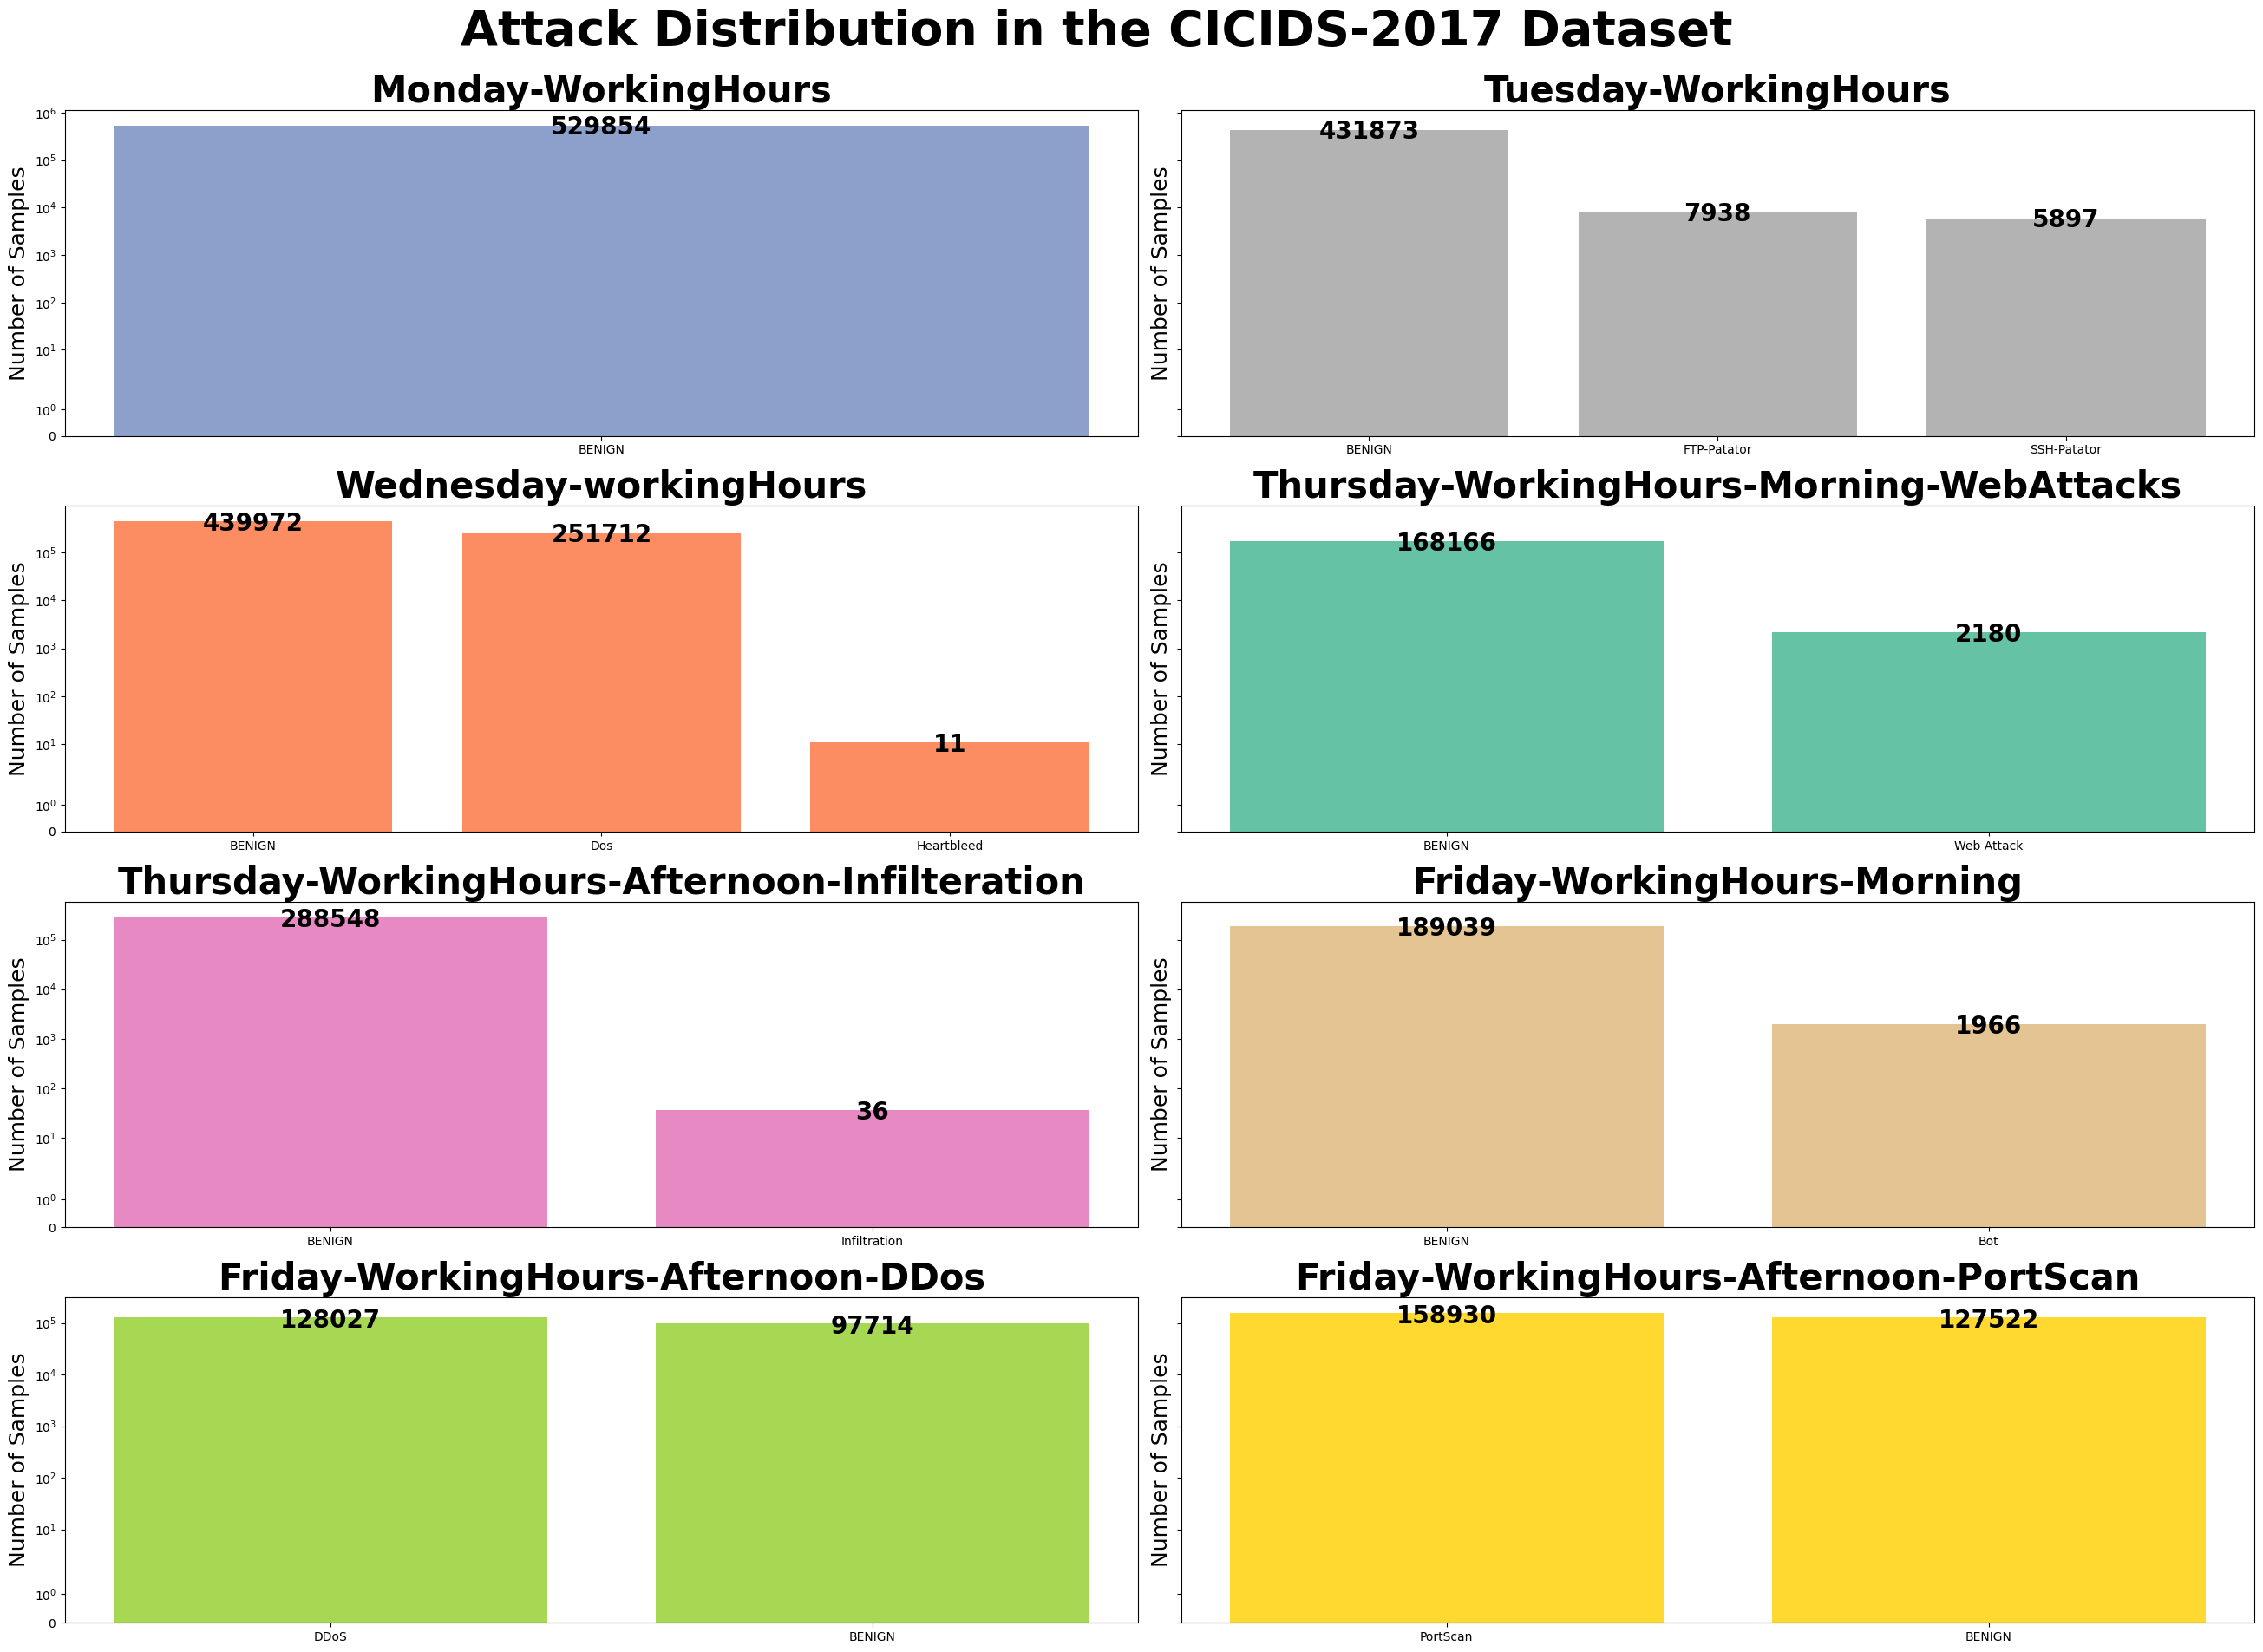

In [12]:
def plot_all_dfs_file_types():

    fig, axes = plt.subplots(4, 2, sharey='row', figsize=(27, 20))
    axes = axes.flatten()

    cmap = plt.get_cmap('Set2')
    colors = list(cmap(np.arange(cmap.N)))
    random.shuffle(colors)
    colors_iter = iter(colors)

    for idx, (df_name, df_data) in enumerate(dfs_names.items()):
        attack_labels, sample_counts = get_attack_distribution(df_data)

        axes[idx].bar(attack_labels, sample_counts, color=next(colors_iter))
        axes[idx].set_title(df_name, fontsize=30, weight='bold')
        axes[idx].set_ylabel('Number of Samples', fontsize=18)
        axes[idx].set_yscale('symlog')

        for rect, count in zip(axes[idx].patches, sample_counts):
            height = rect.get_height()
            axes[idx].text(
                rect.get_x() + rect.get_width() / 2,
                height / 2,
                f'{count}',
                ha='center',
                va='bottom',
                fontsize=20,
                weight='bold'
            )

    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle('Attack Distribution in the CICIDS-2017 Dataset', fontsize=40, weight='bold')

    plt.show()

def get_attack_distribution(dataframe):
    attack_counts = dataframe['Label'].value_counts()
    return attack_counts.index.tolist(), attack_counts.values.tolist()

plot_all_dfs_file_types()

In [13]:
def print_file_types(dataframe, df_name):
    print(df_name)
    for label in dataframe['Label'].unique():
        print('{} : {} samples'.format(label,dataframe.loc[dataframe['Label'] == label]['Label'].count()))

In [14]:
print_file_types(mn_benign_df, 'Monday-WorkingHours')

Monday-WorkingHours
BENIGN : 529854 samples


In [15]:
print_file_types(tu_wh_df, 'Tuesday-WorkingHours')

Tuesday-WorkingHours
BENIGN : 431873 samples
FTP-Patator : 7938 samples
SSH-Patator : 5897 samples


In [16]:
print_file_types(we_wh_df, 'Wednesday-workingHours')

Wednesday-workingHours
BENIGN : 439972 samples
Dos : 251712 samples
Heartbleed : 11 samples


In [17]:
print_file_types(th_mr_df, 'Thursday-WorkingHours-Morning-WebAttacks')

Thursday-WorkingHours-Morning-WebAttacks
BENIGN : 168166 samples
Web Attack : 2180 samples


In [18]:
print_file_types(th_an_df, 'Thursday-WorkingHours-Afternoon-Infilteration')

Thursday-WorkingHours-Afternoon-Infilteration
BENIGN : 288548 samples
Infiltration : 36 samples


In [19]:
print_file_types(fr_mr_df, 'Friday-WorkingHours-Morning')

Friday-WorkingHours-Morning
BENIGN : 189039 samples
Bot : 1966 samples


In [20]:
print_file_types(fr_an_ddos_df, 'Friday-WorkingHours-Afternoon-DDos')

Friday-WorkingHours-Afternoon-DDos
BENIGN : 97714 samples
DDoS : 128027 samples


In [21]:
print_file_types(fr_an_ps_df, 'Friday-WorkingHours-Afternoon-PortScan')

Friday-WorkingHours-Afternoon-PortScan
BENIGN : 127522 samples
PortScan : 158930 samples


In [22]:
combined_df = pd.concat(dfs_names.values(), ignore_index=True)
combined_df.to_csv('MachineLearningCVE/CICIDS-2017_Combined.csv', index=False)
combined_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829380,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2829381,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2829382,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2829383,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829385 entries, 0 to 2829384
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [24]:
num_samples, num_features = combined_df.shape
print(f"Number of Samples: {num_samples}")
print(f"Number of Features: {num_features}")

Number of Samples: 2829385
Number of Features: 79


In [25]:
label_counts = combined_df['Label'].value_counts()
print(f"Label Counts: {label_counts}")

Label Counts: Label
BENIGN          2272688
Dos              251712
PortScan         158930
DDoS             128027
FTP-Patator        7938
SSH-Patator        5897
Web Attack         2180
Bot                1966
Infiltration         36
Heartbleed           11
Name: count, dtype: int64


In [26]:
print(f"Number of columns before deletion: {len(combined_df.columns)}")
print("Columns before deletion:")
print(combined_df.columns)

Number of columns before deletion: 79
Columns before deletion:
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 

In [27]:
zero_columns = combined_df.columns[(combined_df == 0).all()]

In [28]:
print(f"Total columns with all zero values: {len(zero_columns)}")
print("Columns with all zero values:")
print(zero_columns)

Total columns with all zero values: 8
Columns with all zero values:
Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')


In [29]:
combined_df.drop(columns=zero_columns, inplace=True)

In [30]:
print(f"Number of columns after deletion: {len(combined_df.columns)}")
print("Columns after deletion:")
print(combined_df.columns)

Number of columns after deletion: 71
Columns after deletion:
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag 

In [31]:
print(f"Number of rows before removing duplicates: {len(combined_df)}")

Number of rows before removing duplicates: 2829385


In [32]:
combined_df.drop_duplicates(inplace=True)

In [33]:
print(f"Number of rows after removing duplicates: {len(combined_df)}")

Number of rows after removing duplicates: 2522009


In [34]:
def eda(data):
    print(f"Dimensions: {data.shape[0]} rows, {data.shape[1]} columns")
    print("%38s %10s   %10s" % ("Column Name", "Data Type", "# Distinct"))

    col_names = data.columns
    dtypes = data.dtypes
    unique_counts = data.nunique()

    for i in range(len(data.columns)):
        print("%38s %10s   %10s" % (
            col_names[i],
            dtypes.iloc[i],
            unique_counts.iloc[i]
        ))

eda(combined_df)

Dimensions: 2522009 rows, 71 columns
                           Column Name  Data Type   # Distinct
                      Destination Port      int64        53804
                         Flow Duration      int64      1050899
                     Total Fwd Packets      int64         1432
                Total Backward Packets      int64         1747
           Total Length of Fwd Packets      int64        17928
           Total Length of Bwd Packets      int64        64698
                 Fwd Packet Length Max      int64         5279
                 Fwd Packet Length Min      int64          384
                Fwd Packet Length Mean    float64        99716
                 Fwd Packet Length Std    float64       253909
                 Bwd Packet Length Max      int64         4838
                 Bwd Packet Length Min      int64          583
                Bwd Packet Length Mean    float64       147614
                 Bwd Packet Length Std    float64       248869
                  

In [35]:
for i in  combined_df.columns.tolist():
    print(i, ': min =', min(df[i]), ', max =', max(df[i]))

Destination Port : min = 0 , max = 65389
Flow Duration : min = -13 , max = 119999949
Total Fwd Packets : min = 1 , max = 3119
Total Backward Packets : min = 0 , max = 3635
Total Length of Fwd Packets : min = 0 , max = 232349
Total Length of Bwd Packets : min = 0 , max = 7150819
Fwd Packet Length Max : min = 0 , max = 13929
Fwd Packet Length Min : min = 0 , max = 1472
Fwd Packet Length Mean : min = 0.0 , max = 3412.938776
Fwd Packet Length Std : min = 0.0 , max = 3541.466551
Bwd Packet Length Max : min = 0 , max = 10136
Bwd Packet Length Min : min = 0 , max = 1460
Bwd Packet Length Mean : min = 0.0 , max = 2442.523124
Bwd Packet Length Std : min = 0.0 , max = 2628.883261
Flow Bytes/s : min = -193000000.0 , max = inf
Flow Packets/s : min = -2000000.0 , max = inf
Flow IAT Mean : min = -13.0 , max = 98100000.0
Flow IAT Std : min = 0.0 , max = 84800000.0
Flow IAT Max : min = -13 , max = 120000000
Flow IAT Min : min = -13 , max = 98100000
Fwd IAT Total : min = 0 , max = 120000000
Fwd IAT Mea

In [36]:
label_counts = combined_df['Label'].value_counts()

print("Label Count:")
for label, count in label_counts.items():
    print(f"{label}: {count} samples")

Label Count:
BENIGN: 2096134 samples
Dos: 193745 samples
DDoS: 128016 samples
PortScan: 90819 samples
FTP-Patator: 5933 samples
SSH-Patator: 3219 samples
Web Attack: 2143 samples
Bot: 1953 samples
Infiltration: 36 samples
Heartbleed: 11 samples


In [37]:
columns_with_negative_values = {}

for column in combined_df.columns:
    if pd.api.types.is_numeric_dtype(combined_df[column]):
        negative_values = combined_df[combined_df[column] < 0]
        if not negative_values.empty:
            columns_with_negative_values[column] = len(negative_values)

print("Columns containing negative values:")
for column, count in columns_with_negative_values.items():
    print(f"{column} : {count}")

Columns containing negative values:
Flow Duration : 107
Flow Bytes/s : 78
Flow Packets/s : 107
Flow IAT Mean : 107
Flow IAT Max : 107
Flow IAT Min : 2880
Fwd IAT Min : 17
Fwd Header Length : 35
Bwd Header Length : 22
Fwd Header Length.1 : 35
Init_Win_bytes_forward : 911027
Init_Win_bytes_backward : 1216166
min_seg_size_forward : 35


In [38]:
for column in columns_with_negative_values:
    min_positive_value = combined_df[column][combined_df[column] > 0].min()
    combined_df[column] = combined_df[column].apply(lambda x: min_positive_value if x < 0 else x)

numeric_df = combined_df.select_dtypes(include=np.number)
any_negative_values_left = (numeric_df < 0).any().any()
print(f"Negative Values in the Dataset : {any_negative_values_left}")

Negative Values in the Dataset : False


In [39]:
inf_columns = numeric_df.columns[numeric_df.isin([np.inf, -np.inf]).any()]

print("Columns with infinity or minus infinity:")
print(inf_columns)

Columns with infinity or minus infinity:
Index(['Flow Bytes/s', 'Flow Packets/s'], dtype='object')


In [40]:
for col in inf_columns:
    max_positive_value = combined_df[col][combined_df[col] != np.inf].max()
    combined_df[col] = np.where(combined_df[col] == np.inf, max_positive_value, combined_df[col])

for col in inf_columns:
    min_positive_value = combined_df[col][combined_df[col] != -np.inf].min()
    combined_df[col] = np.where(combined_df[col] == -np.inf, min_positive_value, combined_df[col])

In [41]:
any_infinity_left = np.isinf(combined_df.select_dtypes(include=np.number)).any().any()
print("Any infinity or negative infinity values left in the numeric part of the dataset:", any_infinity_left)

Any infinity or negative infinity values left in the numeric part of the dataset: False


In [42]:
for i in combined_df.columns.tolist():
    print(i, ': min =', min(combined_df[i]), ', max =', max(combined_df[i]))

Destination Port : min = 0 , max = 65535
Flow Duration : min = 0 , max = 119999998
Total Fwd Packets : min = 1 , max = 219759
Total Backward Packets : min = 0 , max = 291922
Total Length of Fwd Packets : min = 0 , max = 12900000
Total Length of Bwd Packets : min = 0 , max = 655453030
Fwd Packet Length Max : min = 0 , max = 24820
Fwd Packet Length Min : min = 0 , max = 2325
Fwd Packet Length Mean : min = 0.0 , max = 5940.857143
Fwd Packet Length Std : min = 0.0 , max = 7125.5968458437
Bwd Packet Length Max : min = 0 , max = 19530
Bwd Packet Length Min : min = 0 , max = 2896
Bwd Packet Length Mean : min = 0.0 , max = 5800.5
Bwd Packet Length Std : min = 0.0 , max = 8194.660487
Flow Bytes/s : min = 0.0 , max = 2071000000.0
Flow Packets/s : min = 0.016701329 , max = 4000000.0
Flow IAT Mean : min = 0.0 , max = 120000000.0
Flow IAT Std : min = 0.0 , max = 84800261.5664079
Flow IAT Max : min = 0 , max = 120000000
Flow IAT Min : min = 0 , max = 120000000
Fwd IAT Total : min = 0 , max = 1200000

In [43]:
label_counts = combined_df['Label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count} samples")

Label Counts:
BENIGN: 2096134 samples
Dos: 193745 samples
DDoS: 128016 samples
PortScan: 90819 samples
FTP-Patator: 5933 samples
SSH-Patator: 3219 samples
Web Attack: 2143 samples
Bot: 1953 samples
Infiltration: 36 samples
Heartbleed: 11 samples


In [44]:
columns_with_missing_values = combined_df.columns[combined_df.isnull().any()]

for column in columns_with_missing_values:
    missing_count = combined_df[column].isnull().sum()
    print(f"Column: {column}, Missing Values: {missing_count}")

total_missing_values = combined_df.isnull().sum().sum()
print(f"Total Number of Missing Values in the DataFrame: {total_missing_values}")

Total Number of Missing Values in the DataFrame: 0


In [45]:
combined_df = combined_df[~combined_df['Label'].isin(['Dos','PortScan', 'DDoS','FTP-Patator','SSH-Patator','Bot', 'Infiltration','Heartbleed'])]

label_counts_updated = combined_df['Label'].value_counts()
print("Updated Label Counts:")
print(label_counts_updated)

Updated Label Counts:
Label
BENIGN        2096134
Web Attack       2143
Name: count, dtype: int64


In [46]:
combined_df.to_csv('MachineLearningCVE/CICIDS-2017_Multi.csv', index=False)

In [47]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098277 entries, 0 to 2829384
Data columns (total 71 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow 